In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from matplotlib import style
plt.style.use('seaborn-talk')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Sequence [A133058](https://oeis.org/A133058):


## *Define Sequence*-

In [2]:
y = np.array([0])
for n in range(0,1501):
  if n==1 or n==0:
      y = np.append(y,1)
  else:
    if math.gcd(n,y[n])==1:
      y = np.append(y,y[n]+n+1)
    elif math.gcd(n,y[n])>1:
      y = np.append(y, y[n]//math.gcd(n,y[n]))

## *Plot Sequence*-


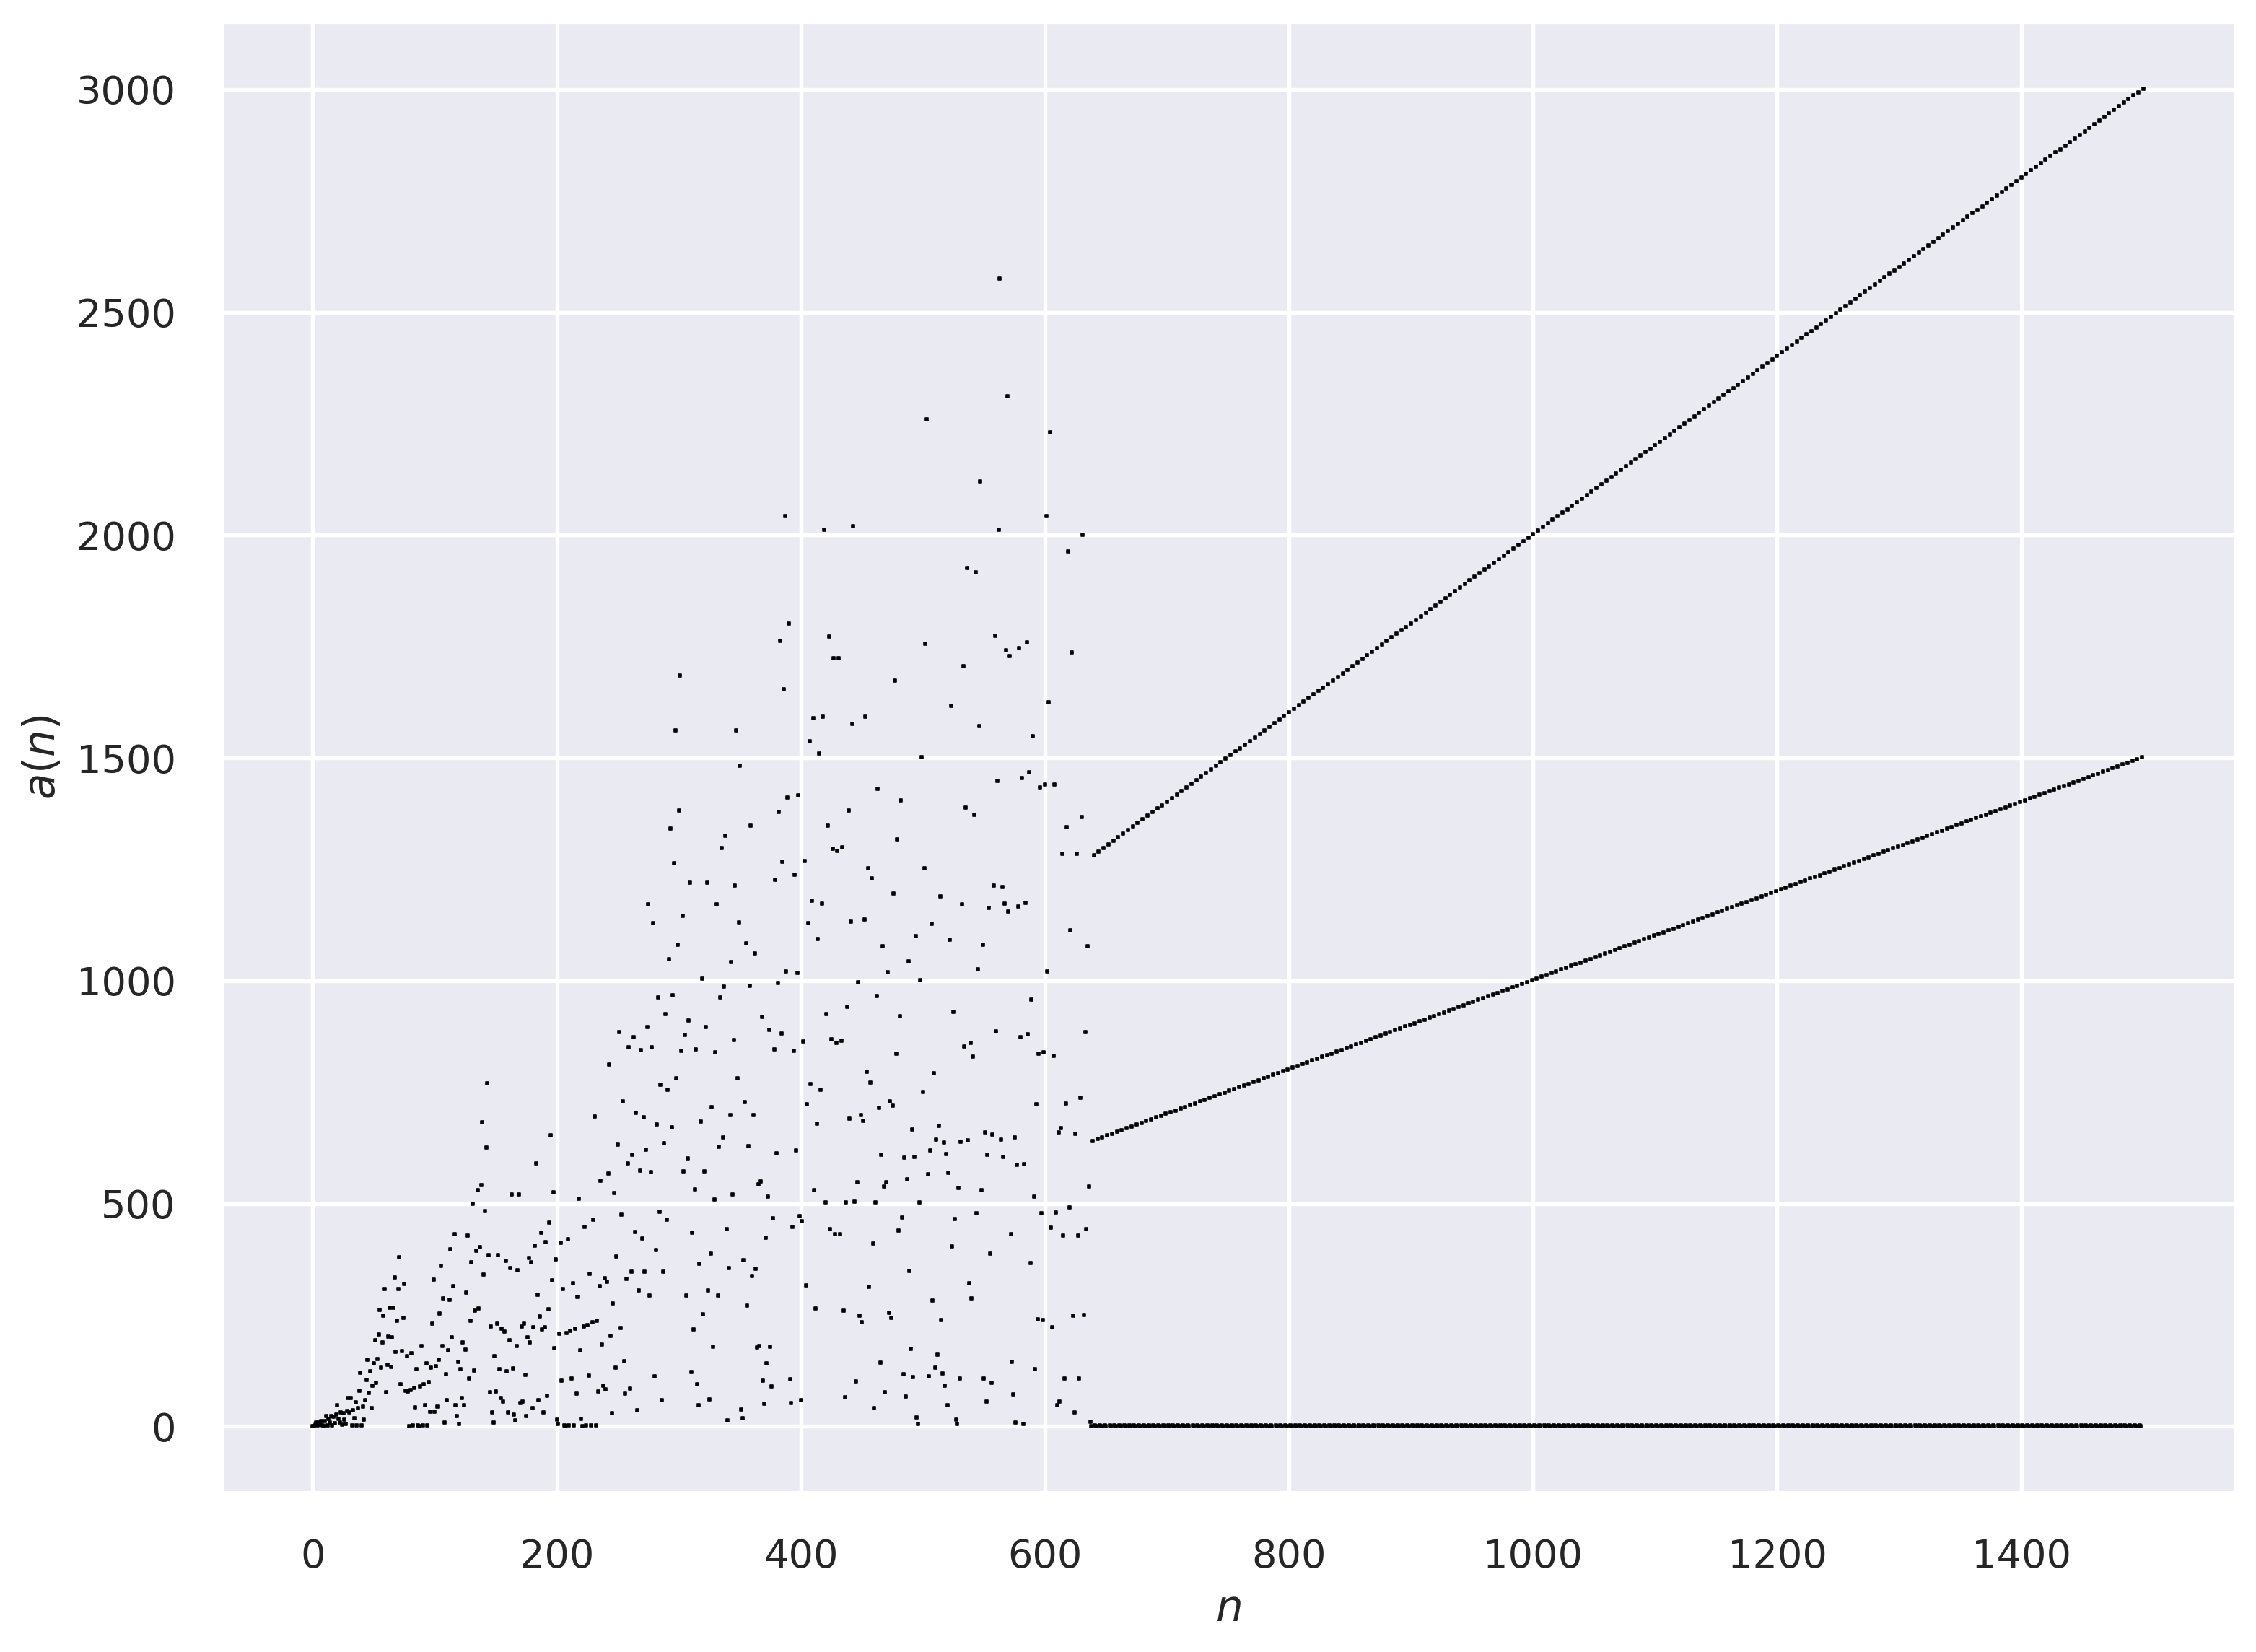

In [3]:
plt.figure(figsize=(12,9),dpi=300)
plt.scatter(np.arange(0,len(y))[1:]-1,y[1:],s=1,marker='s',c='black')
plt.xlabel('$n$')
plt.ylabel('$a(n)$')
plt.show()

# Sequence [A265326](https://oeis.org/A265326):

## *Define Sequence*-

In [4]:
def primesfrom2to(n):
    sieve = np.ones(n//3 + (n%6==2), dtype=np.bool)
    sieve[0] = False
    for i in range(int(n**0.5)//3+1):
        if sieve[i]:
            k=3*i+1|1
            sieve[      ((k*k)//3)      ::2*k] = False
            sieve[(k*k+4*k-2*k*(i&1))//3::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0]+1)|1)]

b = np.binary_repr

def rev(num):
  return int(str(num)[::-1])

def deci(n):
  return int(n, 2)

n = 100000
primes = primesfrom2to(n)

y = np.array([])
for i in primes:
  y = np.append(y, i-deci(str(rev(b(i)))))
y

array([ 1.0000e+00,  0.0000e+00,  0.0000e+00, ...,  9.6000e+02,
        1.3266e+04, -1.9500e+04])

## *Plot Sequence-*

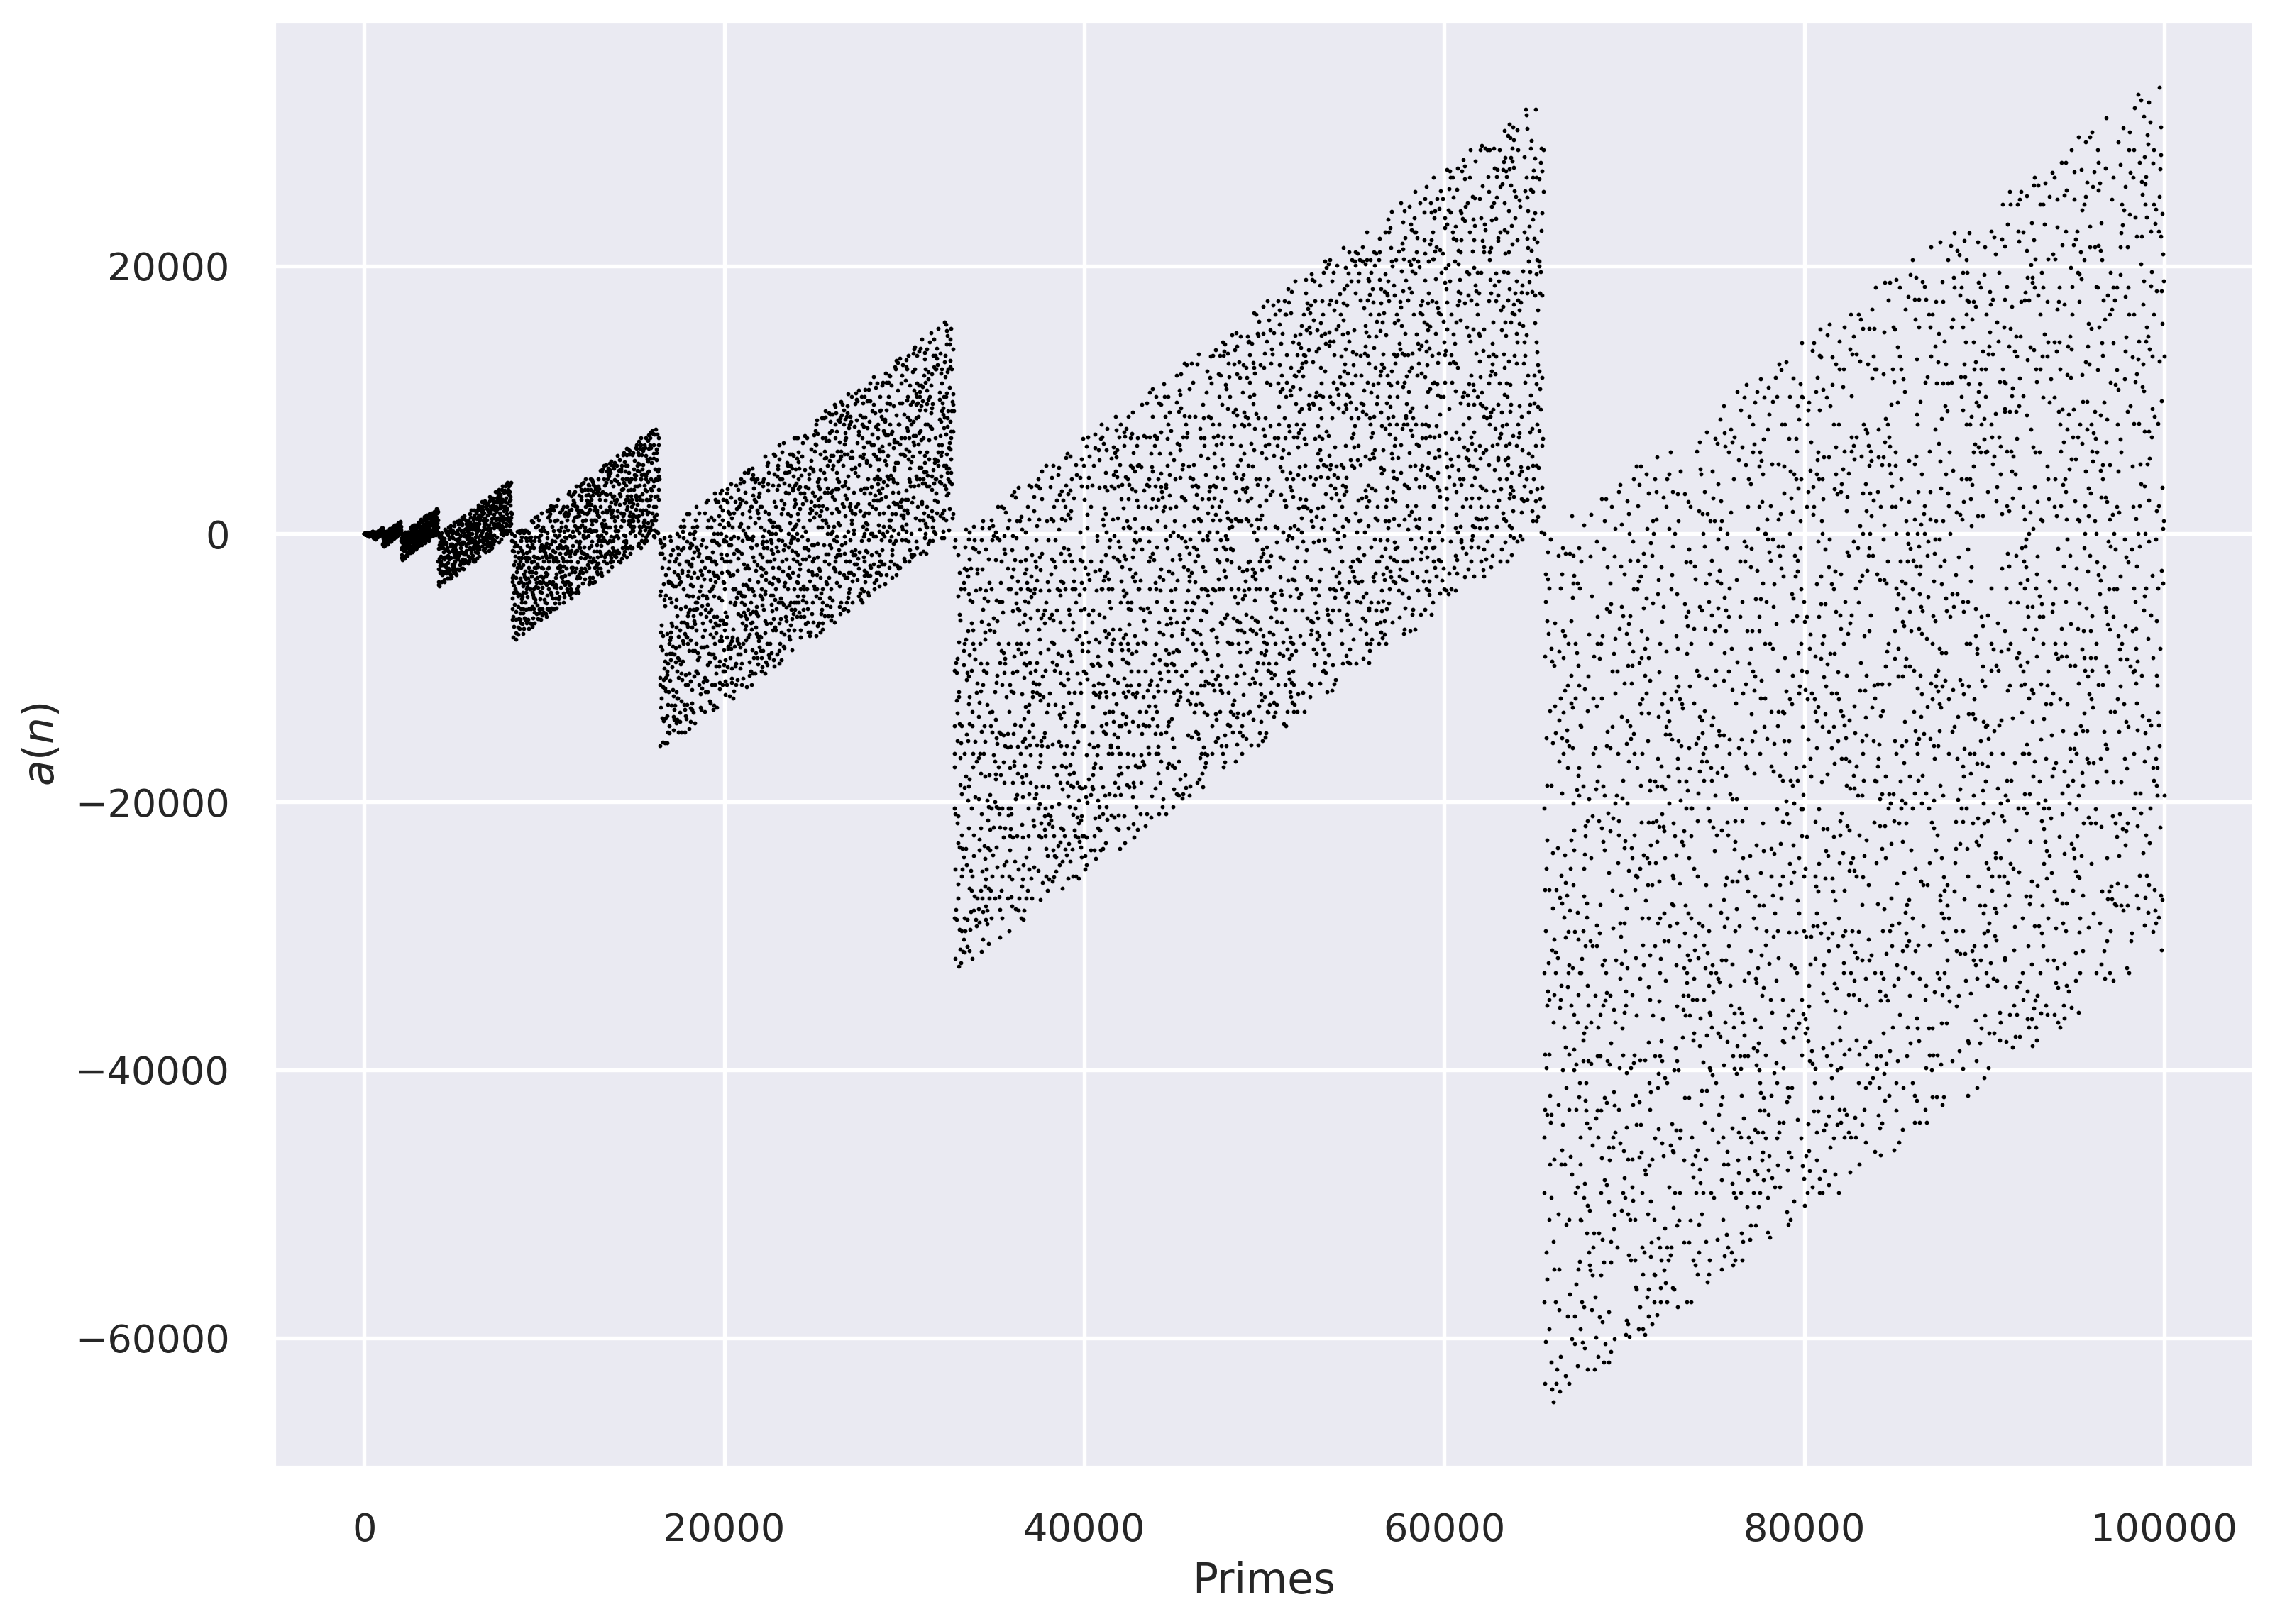

In [5]:
plt.figure(figsize=(12,9),dpi=300)
plt.scatter(primes,y,s=1,c='black')
plt.xlabel('Primes')
plt.ylabel('$a(n)$')
plt.show()